In [102]:
#importing packages

import requests
import pandas as pd
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
from mplsoccer.pitch import Pitch, VerticalPitch
from mplsoccer.utils import FontManager


In [2]:
#scraping

main_url = 'https://understat.com/match/'
match_id = str(input("Insert the match id: "))

url = main_url + match_id

Insert the match id: 16607


In [3]:
url

'https://understat.com/match/16607'

In [4]:
res = requests.get(url)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')

In [5]:
#shot data
strings = scripts[1].string

In [6]:
#strip symbols to have json data

ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [86]:
x = []
y = []
xg = []
team = []
result = []

data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key =='X':
            x.append(data_home[index][key])
        if key =='Y':
            y.append(data_home[index][key])
        if key =='xG':
            xg.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == "result":
            result.append(data_home[index][key])
            
for index in range(len(data_away)):
    for key in data_away[index]:
        if key =='X':
            x.append(data_away[index][key])
        if key =='Y':
            y.append(data_away[index][key])
        if key =='xG':
            xg.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == "result":
            result.append(data_away[index][key])

In [87]:
#dataframe

cols = ['x','y','xg','team','result'] # column names
df = pd.DataFrame([x,y,xg,team,result],index=cols) #creating dataframe
df = df.T #transpose the dataframe

In [88]:
df

,x,y,xg,team,result
0,0.8440000152587891,0.475,0.09475582838058472,Brighton,MissedShots
1,0.8880000305175781,0.5720000076293945,0.03811180591583252,Brighton,BlockedShot
2,0.8809999847412109,0.4570000076293945,0.08492165058851242,Brighton,BlockedShot
3,0.8290000152587891,0.675,0.03191286325454712,Brighton,MissedShots
4,0.9269999694824219,0.669000015258789,0.2729357182979584,Brighton,MissedShots
5,0.855999984741211,0.5690000152587891,0.07586804777383804,Brighton,SavedShot
6,0.919000015258789,0.45299999237060545,0.08224987983703613,Brighton,Goal
7,0.7680000305175781,0.4909999847412109,0.029895208775997162,Brighton,BlockedShot
8,0.7930000305175782,0.4209999847412109,0.0369059294462204,Brighton,BlockedShot
9,0.86,0.3220000076293945,0.049430087208747864,Chelsea,SavedShot


In [89]:
df['x']= (pd.to_numeric(df['x'])/100)*120*100

In [90]:
df['y']= (pd.to_numeric(df['y'])/100)*80*100

In [97]:
df['xg'] = pd.to_numeric(df['xg'])

In [98]:
df

,x,y,xg,team,result
0,101.280002,38.000000,0.094756,Brighton,MissedShots
1,106.560004,45.760001,0.038112,Brighton,BlockedShot
2,105.719998,36.560001,0.084922,Brighton,BlockedShot
3,99.480002,54.000000,0.031913,Brighton,MissedShots
4,111.239996,53.520001,0.272936,Brighton,MissedShots
5,102.719998,45.520001,0.075868,Brighton,SavedShot
6,110.280002,36.239999,0.082250,Brighton,Goal
7,92.160004,39.279999,0.029895,Brighton,BlockedShot
8,95.160004,33.679999,0.036906,Brighton,BlockedShot
9,103.200000,25.760001,0.049430,Chelsea,SavedShot


## Visualization

In [16]:
# set general use colors

text_color = 'w'

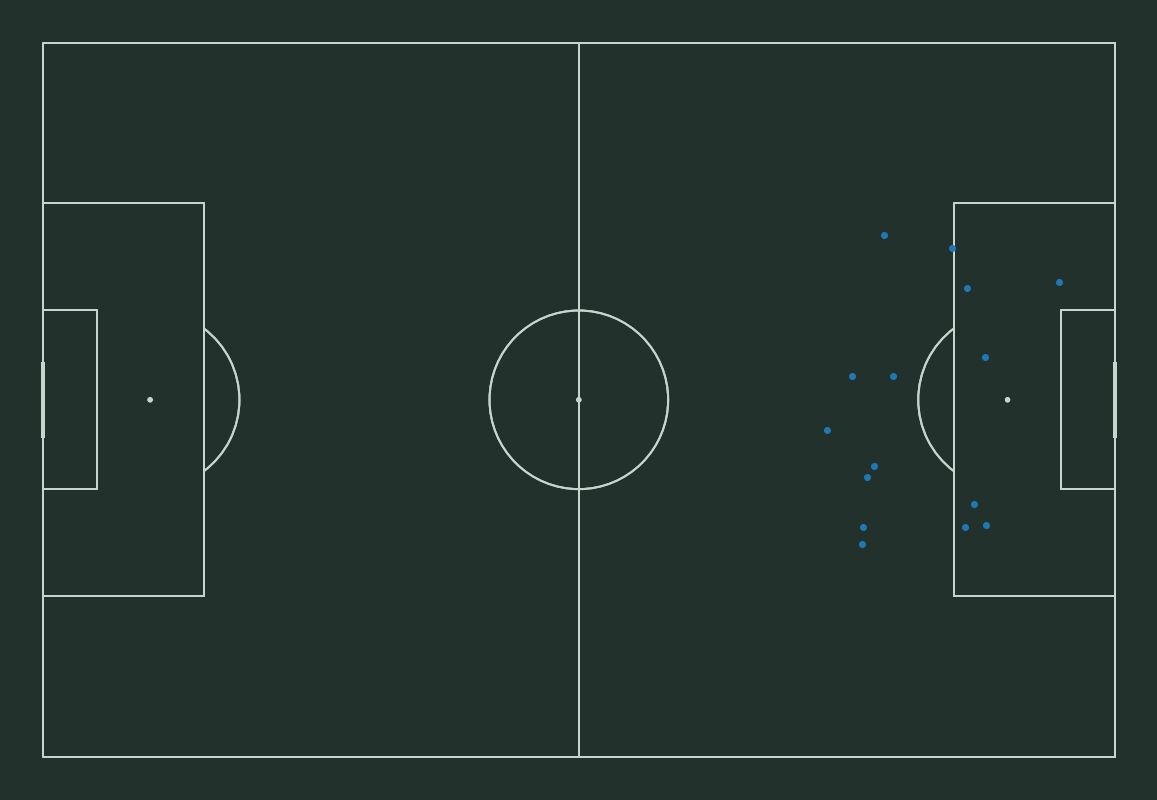

In [94]:
#fig, ax = plt.subplots(figsize=(13,8.5))
#fig.set_facecolor('#22312b')
#ax.patch.set_facecolor('#22312b')

# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

pitch.draw(ax=ax)

plt.gca().invert_yaxis()

plt.scatter(df[df.team=="Chelsea"]["x"],df[df.team=="Chelsea"]["y"])

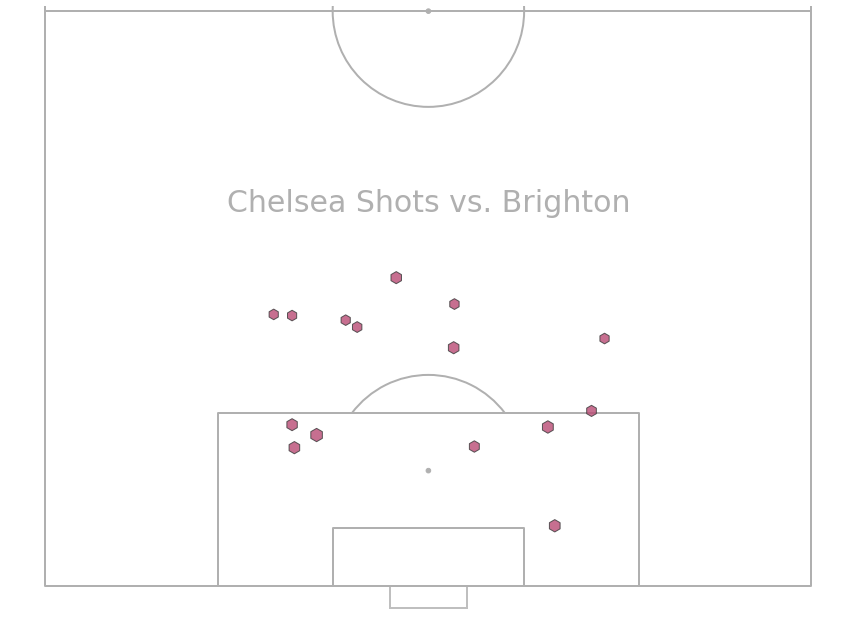

In [106]:

pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8)  # control the goal transparency
fig, ax = pitch.draw(figsize=(12, 10))
plt.gca().invert_yaxis()
sc = pitch.scatter(df[df.team=="Chelsea"]["x"],df[df.team=="Chelsea"]["y"],
                   # size varies between 100 and 1000 (points squared)
                   s=(df[df.team=="Chelsea"]["xg"] * 900) + 100,
                   alpha=.8,
                   c='#b94b75',  # color for scatter in hex format
                   edgecolors='#383838',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html
                   marker='h',
                   ax=ax)

txt = ax.text(x=40, y=80, s='Chelsea Shots vs. Brighton',
              size=30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              color=pitch.line_color,
              va='center', ha='center')

In [75]:
df[df.team=="Chelsea"]

,x,y,xg,team,result
9,103.200000,38.640001,0.049430087208747864,Chelsea,SavedShot
10,91.680002,35.759999,0.014011413790285587,Chelsea,Goal
11,95.160004,63.959999,0.053450241684913635,Chelsea,MissedShots
12,104.280002,42.480002,0.08676789700984955,Chelsea,MissedShots
13,93.000000,48.840001,0.019627073779702187,Chelsea,BlockedShot
14,101.760004,85.560004,0.027439508587121964,Chelsea,BlockedShot
15,103.439996,78.719998,0.06245436519384384,Chelsea,BlockedShot
16,90.600000,64.080002,0.018253594636917114,Chelsea,MissedShots
17,94.200000,87.600000,0.014996528625488281,Chelsea,MissedShots
18,113.760004,79.800000,0.05822473019361496,Chelsea,SavedShot
